In [1]:
from sys import path as syspath
from pathlib import Path
import numpy as np

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
from pyref.style import science
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from pypxr.structure import *
from pypxr.reflectivity import *
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *
from pyref.fitting.logp import LogpExtra_rough


db = rf.db()

In [2]:
znpc_ocs = db.get_oc("C32H16N8Zn")

en_range = np.linspace(274, 295, 1000)

delta_xx = znpc_ocs.xx(en_range)
delta_zz = znpc_ocs.zz(en_range)
delta_iso = znpc_ocs.delta(en_range)

beta_xx = znpc_ocs.ixx(en_range)
beta_zz = znpc_ocs.izz(en_range)
beta_iso = znpc_ocs.beta(en_range)

In [3]:
znpc_mono = {
    "250": {
        "s": db.get_refl("zrt_250.0_100.csv", "ZnPc"),
        "p": db.get_refl("zrt_250.0_190.csv", "ZnPc"),
        },
    "275": {
        "s": db.get_refl("275.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("275.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "280": {
        "s": db.get_refl("280.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("280.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "281": {
        "s": db.get_refl("281.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("281.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282": {
        "s": db.get_refl("282.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282.3": {
        "s": db.get_refl("282.3_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.3_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282.7": {
        "s": db.get_refl("282.7_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.7_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "283.1": {
        "s": db.get_refl("283.1_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("283.1_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("ZnPc_283.7_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_283.7_190.0 (CCD Scan 82869).parquet", "ZnPc"),
    },
    "284.0": {
        "s": db.get_refl("ZnPc_284.0_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_284.0_190.0 (CCD Scan 82869).parquet", "ZnPc"),
        },
    # "284.2": {
    #     "s": db.get_refl("ZnPc_284.2_100.0_refl (CCD Scan 82259).csv", "ZnPc"),
    #     "p": db.get_refl("ZnPc_284.2_190.0_refl (CCD Scan 82261).csv", "ZnPc"),
    #     },
    # "285.1": {
    #     "s": db.get_refl("ZnPc_285.1_100.0_refl (CCD Scan 82259).csv", "ZnPc"),
    #     "p": db.get_refl("ZnPc_285.1_190.0_refl (CCD Scan 82261).csv", "ZnPc"),
    #     },
    # "286.7": {
    #     "s": db.get_refl("ZnPc_286.7_100.0_refl (CCD Scan 82259).csv", "ZnPc"),
    #     "p": db.get_refl("ZnPc_286.7_190.0_refl (CCD Scan 82261).csv", "ZnPc"),
    #     },
    # "287.0": {
    #     "s": db.get_refl("ZnPc_287.0_100.0_refl (CCD Scan 82259).csv", "ZnPc"),
    #     "p": db.get_refl("ZnPc_287.0_190.0_refl (CCD Scan 82261).csv", "ZnPc"),
    #     },
    # "289.0" : {
    #     "s": db.get_refl("ZnPc_289.0_100.0_refl (CCD Scan 82259).csv", "ZnPc"),
    #     "p": db.get_refl("ZnPc_289.0_190.0_refl (CCD Scan 82261).csv", "ZnPc"),
    #     },
    }

,Transition Energy (eV),Transition Amplitude (a.u.),Transition Width (eV),TDM_x,TDM_y,TDM_z,TDM Theta (degrees),Transition Symmetry,TDM_xx,TDM_yy,TDM_zz,TDM_xy,TDM_xz,TDM_yz,Originating atom,Originating MO,Final Cluster transition was placed in)
0,283.71094,0.002573,0.212314,0.007478,0.007478,0.999944,0.605872,1,1.439090e-07,1.439090e-07,2.573150e-03,0,0,0,4,117,0
1,283.72656,0.002346,0.212314,0.007806,0.007806,0.999939,0.632420,1,1.429202e-07,1.429202e-07,2.345338e-03,0,0,0,3,117,0
2,283.82031,0.001113,0.212314,0.008591,0.008591,0.999926,0.696050,1,8.213485e-08,8.213485e-08,1.112785e-03,0,0,0,2,117,0
3,283.88165,0.000459,0.212314,0.007709,0.007709,0.999941,0.624637,1,2.726191e-08,2.726191e-08,4.586232e-04,0,0,0,3,118,0
4,283.88425,0.000124,0.212314,0.006909,0.006909,0.999952,0.559881,1,5.938606e-09,5.938606e-09,1.243988e-04,0,0,0,4,118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,1170.09680,0.044970,5.095542,0.707072,0.707072,0.009941,89.430397,1,2.248226e-02,2.248226e-02,4.444290e-06,0,0,0,2,845,0
2860,1312.91060,0.000029,5.095542,0.707021,0.707021,0.015606,89.105797,1,1.474690e-05,1.474690e-05,7.185059e-09,0,0,0,2,846,0
2861,1312.96110,0.000037,5.095542,0.707059,0.707059,0.011635,89.333366,1,1.856391e-05,1.856391e-05,5.026519e-09,0,0,0,3,846,0
2862,1312.96840,0.000038,5.095542,0.707106,0.707106,0.001301,89.925461,1,1.908022e-05,1.908022e-05,6.458388e-11,0,0,0,4,846,0


[Text(0.5, 0, 'Energy (eV)'),
 Text(0, 0.5, 'Intensity (arb. units)'),
 Text(0.5, 1.0, 'ZnPc NEXAFS'),
 (282.0, 305.0)]

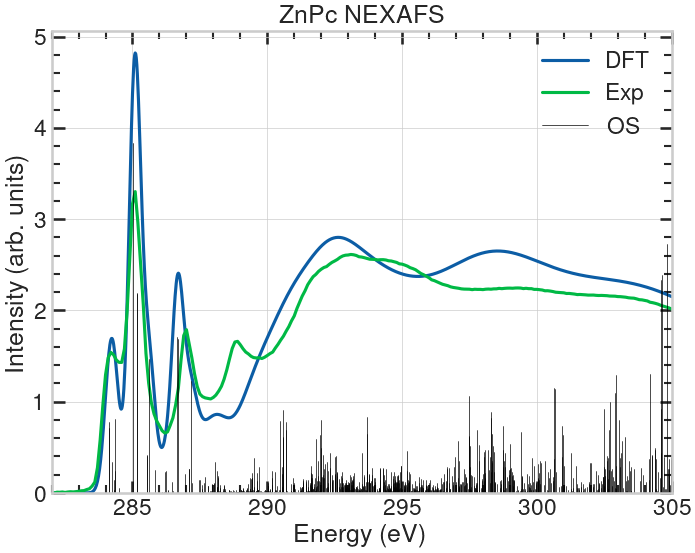

In [31]:
import pandas as pd
dft_exp = pd.read_csv("DFT_MagicAngle.txt")
all_params = pd.read_csv("allParamsSorted.txt", skiprows=1,
                         names=["Transition Energy (eV)", "Transition Amplitude (a.u.)", "Transition Width (eV)",
                                "TDM_x", "TDM_y", "TDM_z", "TDM Theta (degrees)", "Transition Symmetry",
                                "TDM_xx", "TDM_yy", "TDM_zz", "TDM_xy", "TDM_xz", "TDM_yz", "Originating atom",
                                "Originating MO", "Final Cluster transition was placed in)"])
display(all_params)

dft = dft_exp[["eV_","TotalSpec_NEXAFS"]].copy()
exp = dft_exp[["E_55","ZnPc_55"]].copy().dropna()

dft_ps = dft["eV_"].loc[dft["TotalSpec_NEXAFS"] == dft["TotalSpec_NEXAFS"].max()].values[0]
exp_ps = exp["E_55"].loc[exp["ZnPc_55"] == exp["ZnPc_55"].max()].values[0]

energy_shift = dft_ps - exp_ps
dft["eV_"] -= energy_shift

def get_scale():
    en = 320
    stitch_loc = exp.iloc[(exp["E_55"] - en).abs().argsort()[0]]
    _scale = dft["TotalSpec_NEXAFS"].loc[dft["eV_"].round(2) == en].values / stitch_loc["ZnPc_55"]
    return _scale

dft["TotalSpec_NEXAFS"] /= get_scale()
dft["TotalSpec_NEXAFS"] -= dft["TotalSpec_NEXAFS"].loc[dft["eV_"] >= 282].min()
exp["ZnPc_55"] -= exp["ZnPc_55"].loc[exp["E_55"] >= 282].min()

fig, ax = plt.subplots(1, 1, figsize=(8,6))

dft.plot(x="eV_", y="TotalSpec_NEXAFS", ax=ax, label="DFT")
exp.plot(x="E_55", y="ZnPc_55", ax=ax, label="Exp")

for tdm, os in zip(all_params["Transition Energy (eV)"], all_params["Transition Amplitude (a.u.)"]):
    ax.axvline(x=tdm - energy_shift, ymax=os*60, color="k", linestyle="-", linewidth=0.5)
ax.legend(["DFT", "Exp", "OS"], loc="upper right")
ax.set_ylim(bottom=0)
ax.set(
    xlabel="Energy (eV)",
    ylabel="Intensity (arb. units)",
    title="ZnPc NEXAFS",
    xlim=(282, 305),
)

In [5]:
# Load the models
energies = [250, 275, 280, 281, 282, 282.3, 282.7, 283.1, 283.7, 284.0] #289.0]
models = {}.fromkeys(energies)
oocs = {}.fromkeys(energies)

from pypxr.structure import *
from pypxr.reflectivity import *
from pyref.fitting import from_json
import pickle as pkl
import json

# extract structure params, insturment settings, and optical parameters from each saved json file

for i, en in enumerate(energies):
    if (db.res / f"{float(en)}_model.csv").exists():
        sp = pd.read_csv(db.res / f"{float(en)}_model.csv")
        models[en] = sp
    else:
        pass

s = np.loadtxt(db.res / "ZnPc_250eV_s_fit.txt", delimiter=",").T
p = np.loadtxt(db.res / "ZnPc_250eV_p_fit.txt", delimiter=",").T

models[250] = {"s": s, "p": p}
display(models[275])

,Q,Refl_s,Refl_p
0,0.005000,0.715873,0.796802
1,0.005065,0.714617,0.795390
2,0.005130,0.713359,0.793975
3,0.005195,0.712099,0.792558
4,0.005260,0.710836,0.791139
...,...,...,...
995,0.069740,0.001942,0.001737
996,0.069805,0.001925,0.001723
997,0.069870,0.001909,0.001708
998,0.069935,0.001893,0.001694


,xx,zz,dxx,dzz,delta,ddelta,ixx,izz,dixx,dizz,beta,dbeta,energy,dxx_99,dzz_99,dixx_99,dizz_99
0,0.001153,0.001163,0.000013,0.000003,0.000939,NaN,0.000201,0.000201,0.000000e+00,0.000000e+00,0.000201,NaN,275.0,0.000026,0.000006,0.000000e+00,0.000000e+00
1,0.000727,0.000858,0.000051,0.000016,0.000329,NaN,0.000197,0.000197,2.181875e-10,2.224330e-10,0.000197,NaN,280.0,0.000102,0.000032,4.363750e-10,4.448661e-10
2,0.000428,0.000772,0.000031,0.000013,0.000081,NaN,0.000198,0.000198,6.298336e-07,6.415796e-07,0.000197,NaN,281.0,0.000062,0.000026,1.259667e-06,1.283159e-06
3,0.000149,0.000641,0.000030,0.000029,-0.000303,NaN,0.000199,0.000200,1.425224e-06,1.470028e-06,0.000198,NaN,282.0,0.000060,0.000058,2.850448e-06,2.940056e-06
4,0.000032,0.000615,0.000007,0.000024,-0.000469,NaN,0.000200,0.000200,1.555467e-06,1.578348e-06,0.000199,NaN,282.3,0.000013,0.000049,3.110933e-06,3.156697e-06
5,-0.000248,0.000499,0.000030,0.000028,-0.000763,NaN,0.000203,0.000203,4.762332e-07,4.897862e-07,0.000203,NaN,282.7,0.000060,0.000056,9.524665e-07,9.795725e-07
6,-0.000512,0.000389,0.000067,0.000034,-0.001211,NaN,0.000223,0.000218,4.441772e-06,6.513009e-06,0.000221,NaN,283.1,0.000134,0.000068,8.883543e-06,1.302602e-05
7,-0.000784,-0.000144,0.000061,0.000052,-0.002827,NaN,0.000627,0.000387,3.755562e-05,3.322052e-05,0.000810,NaN,283.7,0.000122,0.000104,7.511125e-05,6.644104e-05
8,-0.001457,-0.000317,0.000050,0.000062,-0.002758,NaN,0.001307,0.000548,3.851369e-05,3.694613e-05,0.003419,NaN,284.0,0.000100,0.000124,7.702739e-05,7.389226e-05


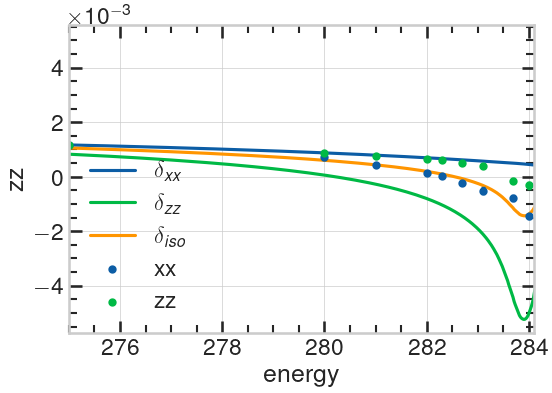

In [6]:
# load fit results
import pandas as pd
fit_res = pd.read_csv(db.res / "ZnPc_OC.csv")
fit_res["dxx_99"] = fit_res["dxx"] * 2
fit_res["dzz_99"] = fit_res["dzz"] * 2
fit_res["dixx_99"] = fit_res["dixx"] * 2
fit_res["dizz_99"] = fit_res["dizz"] * 2
fit_res.loc[fit_res["energy"] == 284.1, "energy"] = 284.0

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
display(fit_res)
ax.plot(en_range, delta_xx, label = r"$\delta_{xx}$", zorder=1)
ax.plot(en_range, delta_zz, label = r"$\delta_{zz}$", zorder=1)
ax.plot(en_range, delta_iso, label = r"$\delta_{iso}$", zorder=1)

fit_res.plot(x = "energy", y = "xx", yerr = "dxx_99", kind = "scatter", ax = ax, color = "C0",edgecolor = "C0", label = "xx", zorder=2)
fit_res.plot(x = "energy", y = "zz", yerr = "dzz_99", kind = "scatter", ax = ax, color="C1", edgecolor = "C1", label = "zz", zorder=2)
ax.set_xlim(275, 284.1)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

plt.legend()

[Text(0.5, 0, 'Energy (eV)'),
 Text(0, 0.5, '$\\beta$ [a.u.]'),
 (275.0, 290.0),
 (0.0, 0.011)]

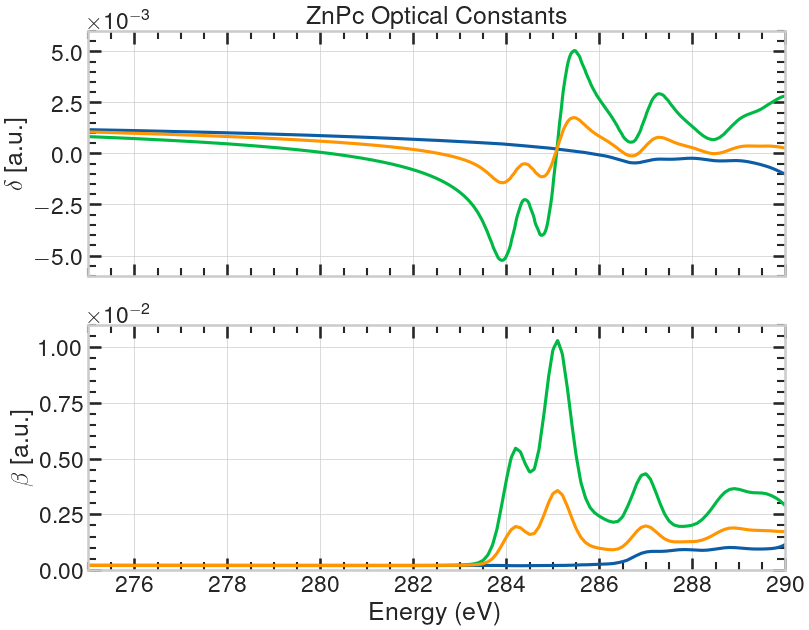

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12*3//4, 10*3//4), sharex=True, )
ax[0].plot(en_range, delta_xx, label = r"$\delta_{xx}$", zorder=1)
ax[0].plot(en_range, delta_zz, label = r"$\delta_{zz}$", zorder=1)
ax[0].plot(en_range, delta_iso, label = r"$\delta_{iso}$", zorder=1)
ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax[1].plot(en_range, beta_xx, label = r"$\beta_{xx}$", zorder=1)
ax[1].plot(en_range, beta_zz, label = r"$\beta_{zz}$", zorder=1)
ax[1].plot(en_range, beta_iso, label = r"$\beta_{iso}$", zorder=1)
ax[1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax[0].set(
    ylabel=r"$\delta$ [a.u.]",
    title="ZnPc Optical Constants",
    xlim=(275, 290),
    ylim = (-6e-3, 6e-3),
)

ax[1].set(
    xlabel="Energy (eV)",
    ylabel=r"$\beta$ [a.u.]",
    xlim=(275, 290),
    ylim = (0, 1.1e-2),
)


C:\Users\hduva\AppData\Local\Temp\ipykernel_13616\2238342883.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Refl"] = s["Refl"] * scales[i]
C:\Users\hduva\AppData\Local\Temp\ipykernel_13616\2238342883.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Refl"] = s["Refl"] * scales[i]
C:\Users\hduva\AppData\Local\Temp\ipykernel_13616\2238342883.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


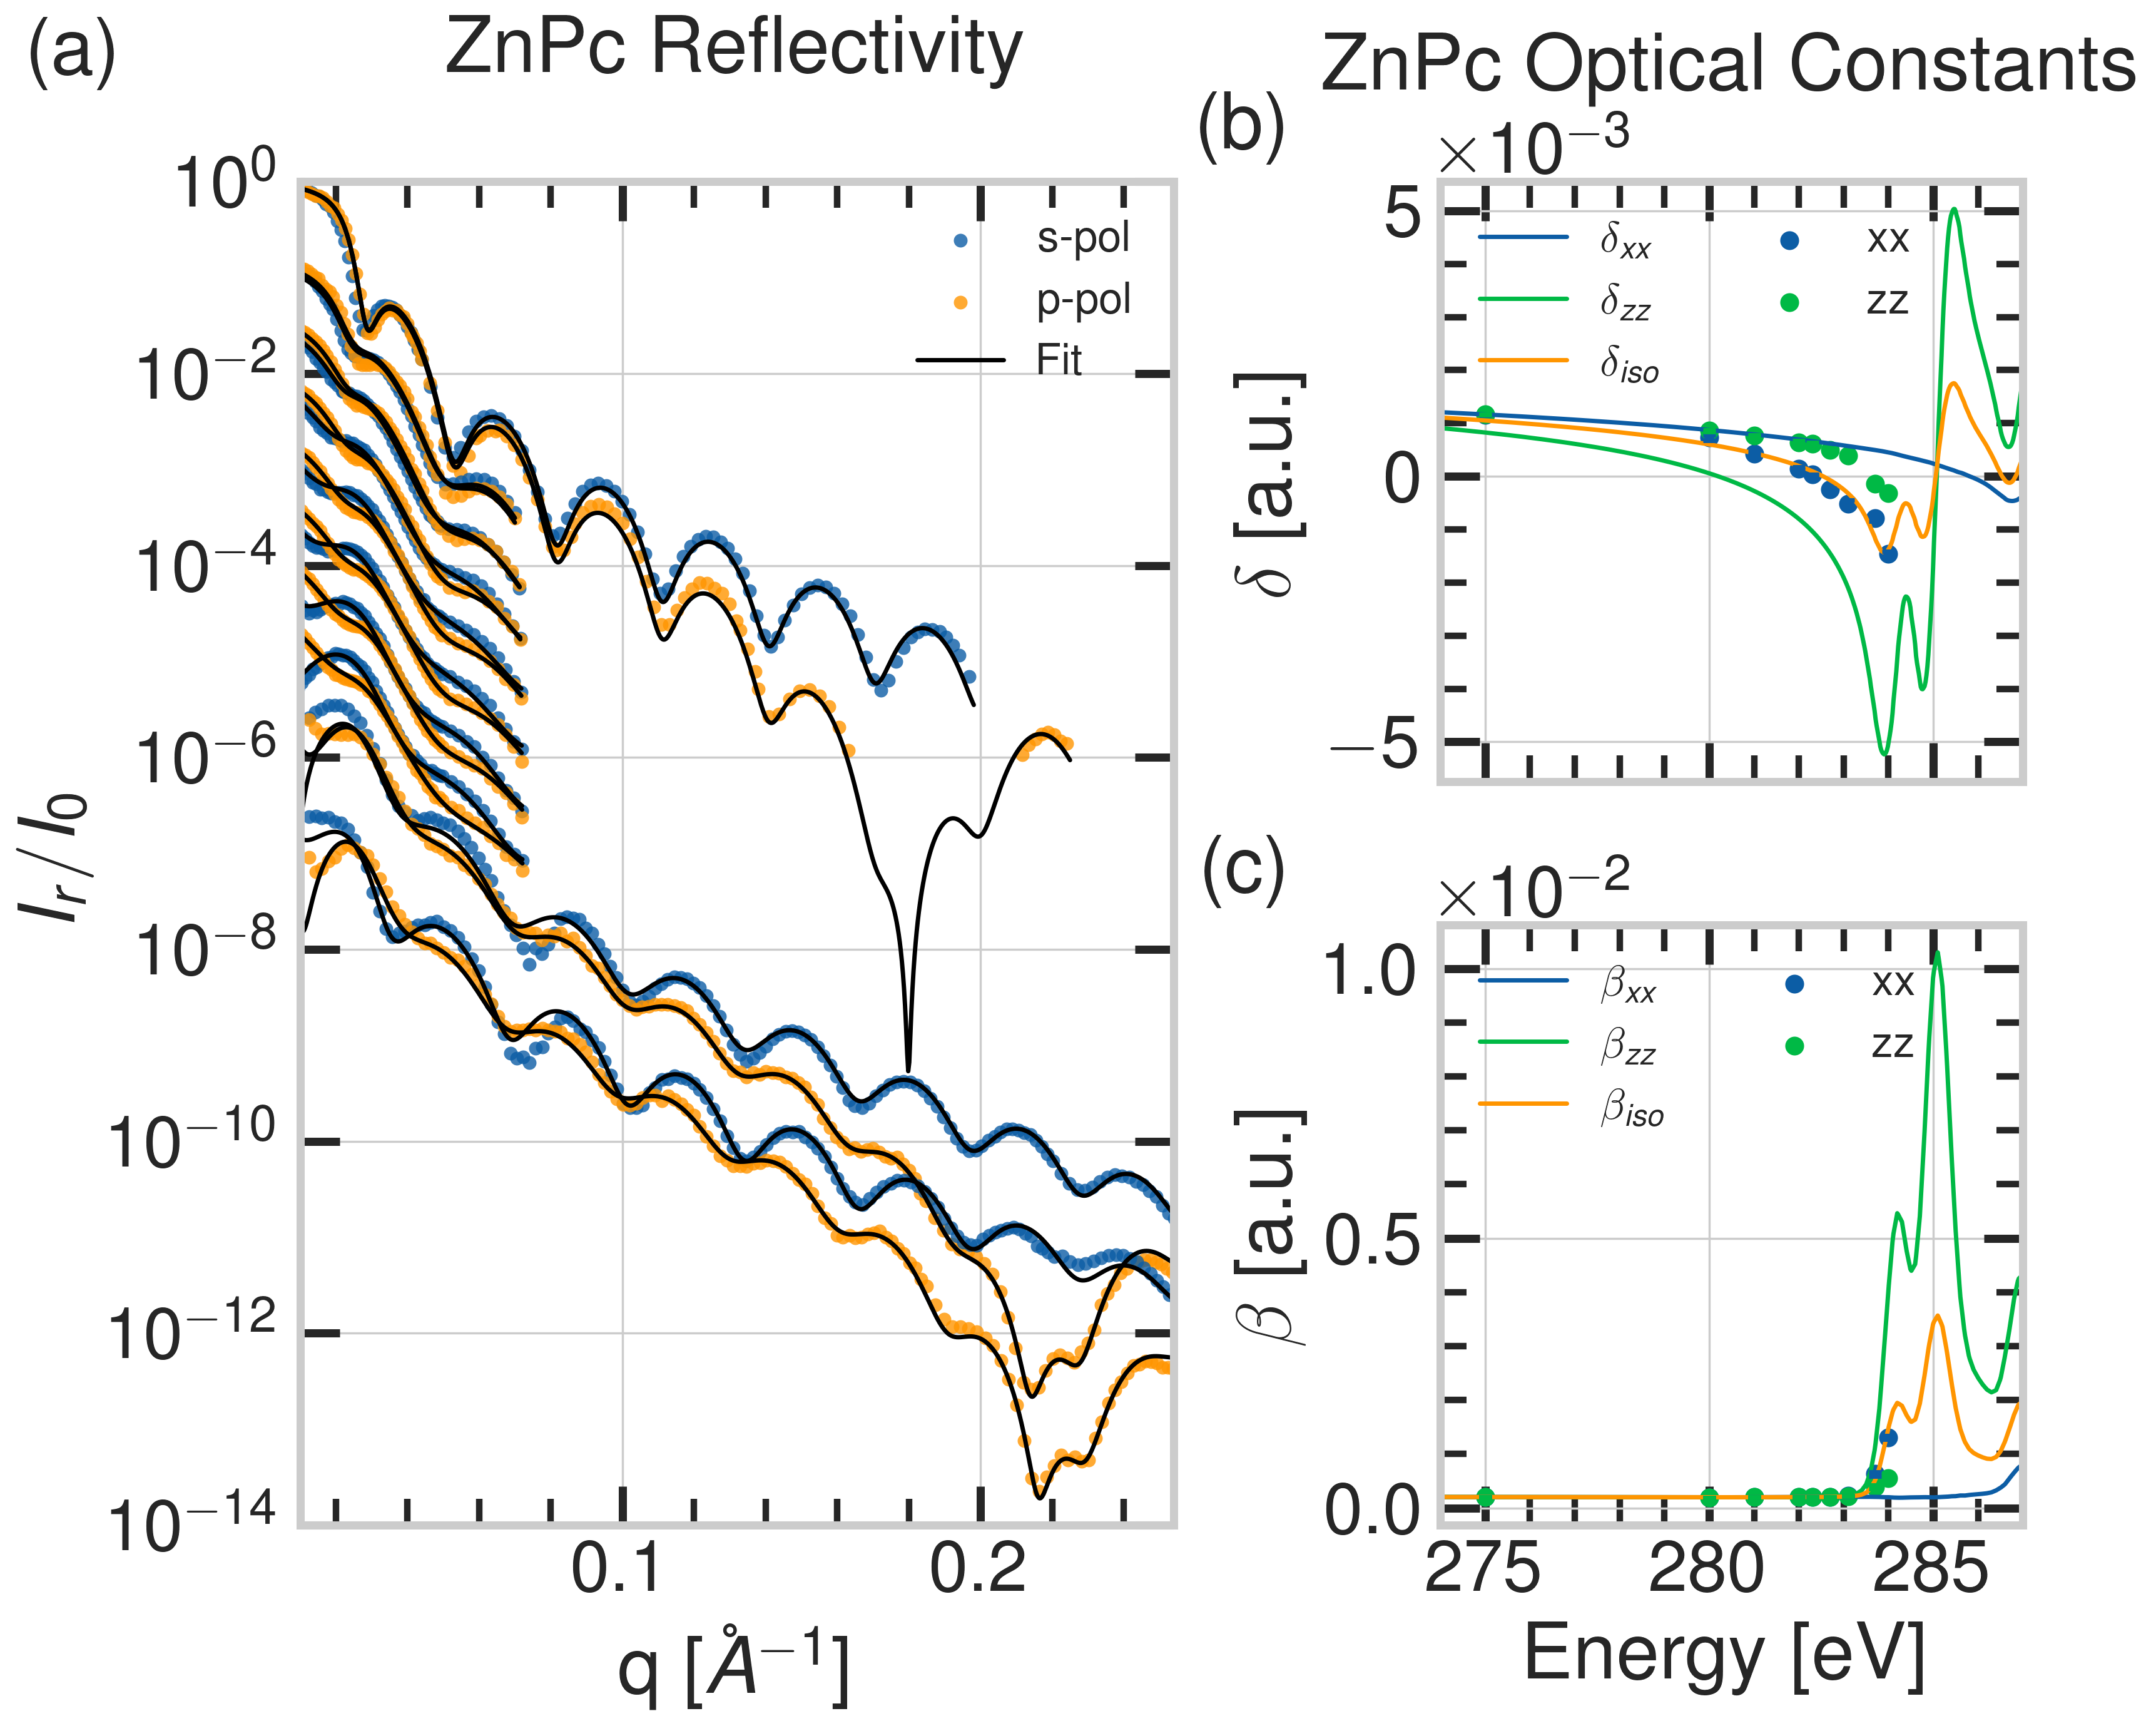

In [7]:

import matplotlib.transforms as mtransforms

legend_prop = {}

fig, ax = plt.subplot_mosaic(
    [["refl", "delta"],
     ["refl", "beta"]],
    layout = "constrained",
    width_ratios = [1.5, 1],
    figsize = (6.5, 5.5),
    dpi=500,
)
fig.align_ylabels()

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

ax["delta"].plot(en_range, delta_xx, label = r"$\delta_{xx}$", linewidth = 1)
ax["delta"].plot(en_range, delta_zz, label = r"$\delta_{zz}$", linewidth = 1)
ax["delta"].plot(en_range, delta_iso, label = r"$\delta_{iso}$", linewidth = 1)

fit_res.plot(x = "energy", y = "xx", yerr = "dxx", kind = "scatter", ax = ax["delta"], color = "C0", s = 8, label = "xx")
fit_res.plot(x = "energy", y = "zz", yerr = "dzz", kind = "scatter", ax = ax["delta"], color = "C1", s = 8, label = "zz")



plt.sca(ax["delta"])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

ax["beta"].plot(en_range, beta_xx, label = r"$\beta_{xx}$", linewidth = 1)
ax["beta"].plot(en_range, beta_zz, label = r"$\beta_{zz}$", linewidth = 1 )
ax["beta"].plot(en_range, beta_iso, label = r"$\beta_{iso}$", linewidth = 1)
fit_res.plot(x = "energy", y = "ixx", yerr = "dixx", kind = "scatter", ax = ax["beta"], color = "C0", s = 8, label = "xx")
fit_res.plot(x = "energy", y = "izz", yerr = "dizz", kind = "scatter", ax = ax["beta"], color = "C1", s = 8, label = "zz")

ax["delta"].set(
    ylabel = r"$\delta$ [a.u.]",
    title = "ZnPc Optical Constants",
    xlim = (274, 287),
)

ax["delta"].legend(loc = "upper left", fontsize = 10, ncols = 2)

plt.sca(ax["beta"])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

ax["beta"].set(
    ylabel = r"$\beta$ [a.u.]",
    xlabel = r"Energy [eV]",
    xlim = (274, 287),
)
ax["beta"].sharex(ax["delta"])
ax["beta"].legend(fontsize = 10, loc="upper left", ncol = 2)
ax["delta"].tick_params(labelbottom = False)


_scales = {
    "250" : 1,
    "series_start": 1/6,
    "series": 1/4,
    "long": 1/12,
    "series_two" : 1/20,
}

scales = []
for i,en in enumerate(energies):
    if en == 250:
        scale = _scales["250"]
    elif en == 275:
        scale = _scales["series_start"] * scales[-1]
    elif 275 < en < 284.0:
        scale = _scales["series"] * scales[-1]
    elif en == 284.0:
        scale = _scales["long"] * scales[-1]
    else:
        scale = _scales["series_two"]/1.5 * scales[-1]
    scales.append(scale)

q_range = np.linspace(0.001, 0.3, 1000)

for i, en in enumerate(energies):
    s = znpc_mono[f"{en}"]["s"].iloc[6:]
    p = znpc_mono[f"{en}"]["p"].iloc[6:]


    if en == 250:
        # in p where Refl < 1e-6
        p = p[p["Refl"] > 1e-6]

    if en > 284:
        p = p[p["Q"] < .1].iloc[2:]
        s = s[s["Q"] < .1].iloc[2:]

    s["Refl"] = s["Refl"] * scales[i]
    p["Refl"] = p["Refl"] * scales[i]

    # scale data frames to have a 1 order of magnitude offset

    s.plot(x = "Q", y = "Refl", ax = ax["refl"], kind = 'scatter', s = 10, color = "C0", alpha=.8, linewidth=0)
    p.plot(x = "Q", y = "Refl", ax = ax["refl"], kind = 'scatter', s = 10, color = "C2", alpha=.8, linewidth=0)

    if en in [250, 275, 280, 281, 282, 282.3, 282.7, 283.1, 283.7, 284.0]:
        if en != 250:
            sns.lineplot(x=models[en]["Q"], y=models[en]["Refl_s"]*scales[i], ax = ax["refl"], color = "k", linewidth = 1)
            sns.lineplot(x=models[en]["Q"], y=models[en]["Refl_p"]*scales[i], ax = ax["refl"], color = "k", linewidth = 1)
            continue

        q_s = models[en]["s"][:,0][q_range <= s.iloc[-1]["Q"]]
        q_p = models[en]["p"][:,0][q_range <= p.iloc[-1]["Q"]]
        s_model = models[en]["s"][:,1][q_range < s.iloc[-1]["Q"]]
        p_model = models[en]["p"][:,1][q_range < p.iloc[-1]["Q"]]

        sns.lineplot(x = q_s, y = s_model * scales[i], ax = ax["refl"], color = "k", linewidth = 1)
        sns.lineplot(x = q_p, y = p_model * scales[i], ax = ax["refl"], color = "k", linewidth = 1)


plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax["refl"].set(
    ylabel = r"$I_r / I_0$",
    xlabel = r"q [$\AA^{-1}$]",
    title = r"ZnPc Reflectivity" + "\n",
    ylim = (1e-14,1),
    xlim = (0.01, 0.254),
    yscale = "log",
)

ax["refl"].legend(labels = ["s-pol", "p-pol", "Fit"], fontsize = 10)

labels = ["(a)", "(b)", "(c)"]
for i, ( _, ax) in enumerate(ax.items()):
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    if i == 0:
        pass
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes + trans, va='top', ha = "right")

fig.savefig("fig4.jpeg", bbox_inches = "tight", dpi = 300)